#  Pré-processamento e transformação em um dataset - ***MOVIES***

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")

print("Path to dataset files:", path)

100%|██████████| 1.05M/1.05M [00:00<00:00, 96.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction/versions/1


- Importando o dataset;

In [2]:
# Coloque nesta célula e rode
!pip -q install kagglehub==0.* scikit-learn==1.* seaborn==0.* pandas==2.* matplotlib==3.* ipywidgets==8.*

import os, zipfile, re, warnings, textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MultiLabelBinarizer, LabelEncoder

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
sns.set()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00


- Instala o kagglehub (para baixar o dataset), além das libs

In [3]:
# Descobre o caminho do CSV, mesmo que esteja dentro de um .zip
csv_path = None

# 1) Se existir movies.csv diretamente na pasta:
cand1 = os.path.join(path, "movies.csv")
if os.path.exists(cand1):
    csv_path = cand1

# 2) Se existir um zip com o conteúdo:
if csv_path is None:
    zips = [f for f in os.listdir(path) if f.lower().endswith(".zip")]
    if zips:
        zf = os.path.join(path, zips[0])
        extract_dir = os.path.join(path, "_extracted")
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(zf) as z:
            z.extractall(extract_dir)
        # procura o movies.csv extraído
        for root, _, files in os.walk(extract_dir):
            for f in files:
                if f.lower() == "movies.csv":
                    csv_path = os.path.join(root, f)
                    break

# Verificação final
if csv_path is None:
    raise FileNotFoundError("Não achei o movies.csv após o download. Verifique o conteúdo baixado.")
print("CSV localizado em:", csv_path)

CSV localizado em: /root/.cache/kagglehub/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction/versions/1/movies.csv


- Achando o arquivo do Kuugle - (Tive dificuldade porque não tava encontrando o arquivo ás vezes)

In [4]:
df_raw = pd.read_csv(csv_path)
df = df_raw.copy()

print("Shape (linhas, colunas):", df.shape)
display(df.head(10))

print("\nInfo():")
print(df.info())

print("\nDescribe numérico:")
display(df.describe())

print("\nContagem de ausentes por coluna:")
display(df.isna().sum().sort_values(ascending=False))


Shape (linhas, colunas): (9999, 9)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN



Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB
None

Describe numérico:


,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000



Contagem de ausentes por coluna:


,0
Gross,9539
RunTime,2958
RATING,1820
VOTES,1820
YEAR,644
GENRE,80
MOVIES,0
ONE-LINE,0
STARS,0


- Alguns dados do dataset

- Contagem de linhas ausentes por colunas dentro do dataset (nomes de colunas, tipos, valores faltando);

In [6]:
def normalize_col(c):
    # lower, troca espaços e hífens por underscore, remove caracteres estranhos
    c = c.strip().lower()
    c = re.sub(r"[ \-]+", "_", c)
    c = re.sub(r"[^a-z0-9_]", "", c)
    return c

df.columns = [normalize_col(c) for c in df.columns]
df.head(3)


,movies,year,genre,rating,one_line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN


- Padronização de escrita e normalização de colunas e nomes;

In [7]:
# remove linhas exatamente iguais
df = df.drop_duplicates().copy()

# se tiver título e ano, remove repetidos por título+ano
if "title" in df.columns and "year" in df.columns:
    df = df.drop_duplicates(subset=["title", "year"]).copy()

df.shape


(9568, 9)

- Duplicadas: tirar repetições que distorcem a análise;

In [ ]:
import numpy as np
import pandas as pd

# YEAR
if "year" in df.columns:
    df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# RATING
if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# VOTES (pega só números)
if "votes" in df.columns:
    tmp = df["votes"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
    tmp = tmp.replace("", np.nan)
    df["votes"] = pd.to_numeric(tmp, errors="coerce")

# RUNTIME em minutos (pega o primeiro número que aparecer)
if "runtime" in df.columns:
    mins = df["runtime"].astype(str).str.extract(r"(\d+)", expand=False)
    df["runtime_min"] = pd.to_numeric(mins, errors="coerce")

# GROSS em número (simples: tira símbolos e vírgulas)
if "gross" in df.columns:
    tmp = df["gross"].astype(str).str.replace(r"[^0-9.]", "", regex=True)
    tmp = tmp.replace("", np.nan)
    df["gross_usd"] = pd.to_numeric(tmp, errors="coerce")

# limpar espaços em texto
for c in ["title","genre","one_line","stars"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().replace({"nan": np.nan})

- Normalização, transformar colunas em numéricas pra poder calcular/plotar/treinar;

In [10]:
if "year" in df.columns:
    df["year"] = df["year"].astype(str).str.extract(r"(\d{4})", expand=False)
    df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

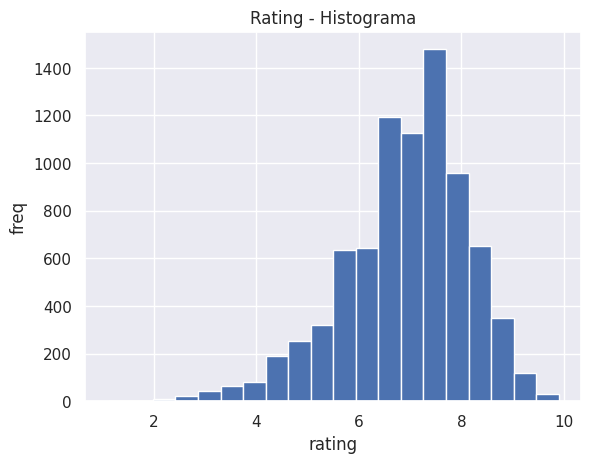

In [11]:
import matplotlib.pyplot as plt

# histograma rating
if "rating" in df.columns:
    df["rating"].hist(bins=20)
    plt.title("Rating - Histograma")
    plt.xlabel("rating"); plt.ylabel("freq")
    plt.show()

# votes antes/depois do log
if "votes" in df.columns and "votes_log1p" in df.columns:
    df["votes"].hist(bins=30)
    plt.title("Votes (original)")
    plt.xlabel("votes"); plt.ylabel("freq")
    plt.show()

    df["votes_log1p"].hist(bins=30)
    plt.title("Votes (log1p)")
    plt.xlabel("log1p(votes)"); plt.ylabel("freq")
    plt.show()

# boxplot simples: rating por gênero primário (top 10)
if "primary_genre" in df.columns and "rating" in df.columns:
    top = df["primary_genre"].value_counts().head(10).index
    df[df["primary_genre"].isin(top)].boxplot(column="rating", by="primary_genre", rot=45)
    plt.title("Rating por Gênero (Top 10)")
    plt.suptitle("")
    plt.xlabel("Gênero"); plt.ylabel("Rating")
    plt.show()

# scatter: rating vs votes_log1p
if "rating" in df.columns and "votes_log1p" in df.columns:
    df.plot.scatter(x="votes_log1p", y="rating", alpha=0.5)
    plt.title("Rating vs Votes (log1p)")
    plt.show()

# barras: gêneros mais frequentes
genre_cols = [c for c in df.columns if c.startswith("genre_")]
if genre_cols:
    (df[genre_cols].sum().sort_values(ascending=False)).plot.bar()
    plt.title("Frequência por Gênero (Top dummies)")
    plt.ylabel("contagem")
    plt.show()


- Geração de gráficos: criar números úteis (tamanho de texto, contagem de atores, gêneros 0/1)

In [ ]:
df.to_csv("movies_clean_preprocessed.csv", index=False, encoding="utf-8")
print("Salvo: movies_clean_preprocessed.csv")


- Exportar: gerar o CSV já limpinho pra próxima etapa.